# Few-Shot Signature Verification Model

Carrissa Gloria Hermman  
2702322411  
LA09  

# Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

In [ ]:
train_path = '/content/drive/MyDrive/glory/Paper RM/train.zip'

extract_path = '/content/dataset'

In [ ]:
if os.path.exists(train_path):
    print("Found zip file. Extracting...")

    with zipfile.ZipFile(train_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    print(f"Success! Data extracted to: {extract_path}")
else:
    print("Could not find the zip file. Check the name in Google Drive!")

Found zip file. Extracting...
Success! Data extracted to: /content/dataset


In [ ]:
!ls /content/dataset/train

writer_1   writer_16  writer_22  writer_29  writer_35  writer_41  writer_7
writer_10  writer_17  writer_23  writer_3   writer_36  writer_42  writer_8
writer_11  writer_18  writer_24  writer_30  writer_37  writer_43  writer_9
writer_12  writer_19  writer_25  writer_31  writer_38  writer_44
writer_13  writer_2   writer_26  writer_32  writer_39  writer_45
writer_14  writer_20  writer_27  writer_33  writer_4   writer_5
writer_15  writer_21  writer_28  writer_34  writer_40  writer_6


In [ ]:
test_path = '/content/drive/MyDrive/glory/Paper RM/test.zip'


In [ ]:
if os.path.exists(test_path):
    print("Found zip file. Extracting...")

    with zipfile.ZipFile(test_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    print(f"Success! Data extracted to: {extract_path}")
else:
    print("Could not find the zip file. Check the name in Google Drive!")

Found zip file. Extracting...
Success! Data extracted to: /content/dataset


In [ ]:
!ls /content/dataset/test

writer_46  writer_48  writer_50  writer_52  writer_54
writer_47  writer_49  writer_51  writer_53  writer_55


# EDA

In [ ]:
import pandas as pd

In [ ]:
TRAIN_DIR = '/content/dataset/train'
TEST_DIR = '/content/dataset/test'

## Verify that the dataset has the correct amount of signatures and writers

In [ ]:
directory_path = []
num_of_folders = []
num_of_images = []

In [ ]:
for dirpath, dirnames, filenames in os.walk(TRAIN_DIR):
    directory_path.append(dirpath)
    num_of_folders.append(len(dirnames))
    num_of_images.append(len(filenames))

In [ ]:
len(num_of_images)

136

In [ ]:
len(directory_path)

136

In [ ]:
for dirpath, dirnames, filenames in os.walk(TEST_DIR):
    directory_path.append(dirpath)
    num_of_folders.append(len(dirnames))
    num_of_images.append(len(filenames))

In [ ]:
data_info = pd.DataFrame({
    'directory path': directory_path,
    'num of folders': num_of_folders,
    'num of images': num_of_images
})
data_info.head()

,directory path,num of folders,num of images
0,/content/dataset/train,45,0
1,/content/dataset/train/writer_23,2,0
2,/content/dataset/train/writer_23/genuine,0,24
3,/content/dataset/train/writer_23/forged,0,24
4,/content/dataset/train/writer_39,2,0


In [ ]:
data_info.iloc[[0, 136], :]

,directory path,num of folders,num of images
0,/content/dataset/train,45,0
136,/content/dataset/test,10,0


From index 0 and 136, it can be inferred that the train directory contains 45 folders, which are the 45 writers. Meanwhile, the test directory has 10 folders, which are the 10 test writers.

In [ ]:
data_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   directory path  167 non-null    object
 1   num of folders  167 non-null    int64 
 2   num of images   167 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.0+ KB


In [ ]:
new_index = []
for index, row in data_info.iterrows():
    # filter to show only the folders with images
    # data_info[index]
    if row['num of images'] > 0:
        new_index.append(index)

In [ ]:
data_info_modified = data_info.iloc[new_index]

In [ ]:
data_info_modified.head()

,directory path,num of folders,num of images
2,/content/dataset/train/writer_23/genuine,0,24
3,/content/dataset/train/writer_23/forged,0,24
5,/content/dataset/train/writer_39/genuine,0,24
6,/content/dataset/train/writer_39/forged,0,24
8,/content/dataset/train/writer_34/genuine,0,24


In [ ]:
data_info_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 2 to 166
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   directory path  110 non-null    object
 1   num of folders  110 non-null    int64 
 2   num of images   110 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ KB


In [ ]:
data_info_modified.describe()

,num of folders,num of images
count,110.0,110.0
mean,0.0,24.0
std,0.0,0.0
min,0.0,24.0
25%,0.0,24.0
50%,0.0,24.0
75%,0.0,24.0
max,0.0,24.0


From the information collected, it can be verified that each folders contains 24 images. There are also 100 folders. Because each writer has 2 folders (genuine and forged), then it can be concluded that there are 110/2 = 55 writers.

## Display a signature

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(np.float64(-0.5), np.float64(587.5), np.float64(437.5), np.float64(-0.5))

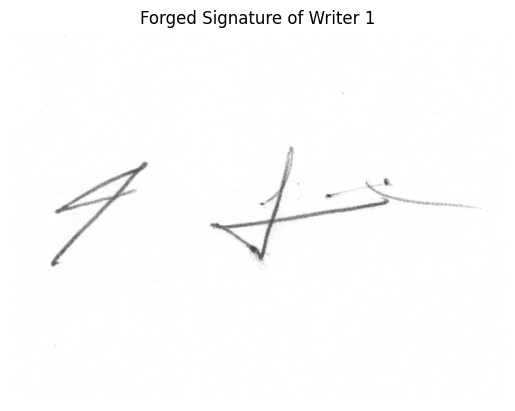

In [ ]:
# Show the forged signature from writer 1
img_for = mpimg.imread('/content/dataset/train/writer_1/forged/forgeries_1_1.png')
plt.imshow(img_for)
plt.title('Forged Signature of Writer 1')
plt.axis("off")

(np.float64(-0.5), np.float64(575.5), np.float64(342.5), np.float64(-0.5))

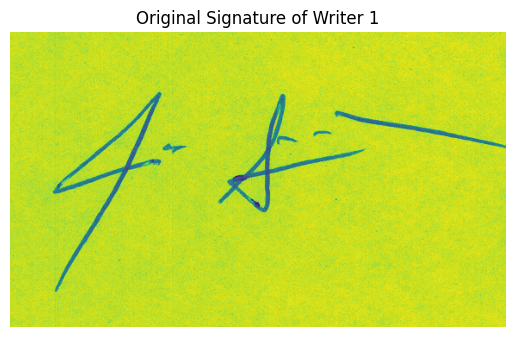

In [ ]:
# Original signature of writer 1
img_org = mpimg.imread('/content/dataset/train/writer_1/genuine/original_1_1.png')
plt.imshow(img_org)
plt.title('Original Signature of Writer 1')
plt.axis("off")

The backgound color was displayed as green because the original image is greyscale. Therefore, colors with a high value such as white will turn into yellow or green when shown as RGB.

## Image size & color scale

In [ ]:
img_for.shape

(438, 588, 4)

In [ ]:
img_org.shape

(343, 576)

The forged signatures' size is 438 x 588 pixels with 4 color channels (RGB)  
The original signatures' size is 343 x 576 pixels with 1 color channel (greyscale).  

Because, the size and number of color channel is different, before the data is used for training, the size and number of color channels should be matched to prevent the model from differentiating the signatures by the size and color channel.

# Preprocessing

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision.transforms.functional as TF

In [ ]:
transform_train = transforms.Compose([
    # add a white padding to make the image into a square
    # Therefore, when the image is transformed, the aspect ratio remains the same
    transforms.Lambda(lambda x: TF.pad(x, (0, 0, max(x.size)-x.size[0], max(x.size)-x.size[1]), fill=255)),

    # data augmentation - to increase the amount of training samples
    # mimic people who write their signatures at an angle
    transforms.RandomRotation(degrees=10, fill=255),
    # mimic difference in scanning (uncentered, or zoomed signatures)
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), fill=255,scale=(0.9, 1.1)),
    # mimic the variety of brightness and lighting when the signatures is scanned
    transforms.ColorJitter(brightness=0.2, contrast=0.2),

    # normal preprocessing
    # resize the image tot 224 x 224 -> default ResNet18 image size
    transforms.Resize((224, 224)),
    # change into 3 color channels
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    # normalize the color value based on ResNet18 standard
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

In [ ]:
# for images that does not need to be augmented (everything except the initial learning dataset)
transform_test = transforms.Compose([
    # add a white padding to make the image into a square
    # Therefore, when the image is transformed, the aspect ratio remains the same
    transforms.Lambda(lambda x: TF.pad(x, (0, 0, max(x.size)-x.size[0], max(x.size)-x.size[1]), fill=255)),

    # normal preprocessing
    # resize teh image tot 224 x 224 -> default ResNet18 image size
    transforms.Resize((224, 224)),
    # change into 3 color channels
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    # normalize the color value based on ResNet18 standard
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
# load the dataset
train_data = datasets.ImageFolder(root=TRAIN_DIR, transform=transform_train)
test_data = datasets.ImageFolder(root=TEST_DIR, transform=transform_test)

In [ ]:
# count the total number of images
len(train_data)

2160

In [ ]:
# the expected number of images for the training dataset
45*2*24

2160

In [ ]:
len(test_data)

480

In [ ]:
# the expected number of images for the testing dataset
10*2*24

480

In [ ]:
# check whether the size and number of color channels of the image is correct
img, label = train_data[0]
print(f'Shape: {img.shape}')
print(f'Index writer: {label}')

Shape: torch.Size([3, 224, 224])
Index writer: 0


In [ ]:
img, label = test_data[88]
print(f'Shape: {img.shape}')
print(f'Index writer: {label}')

Shape: torch.Size([3, 224, 224])
Index writer: 1


The image has been successfully resized and changed to 3 color channels to match ResNet18 input.

# Build Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, Subset
from torchvision import models
import torchvision.models as models
import random
import numpy as np

In [ ]:
random.seed(88)
np.random.seed(88)
torch.manual_seed(88)
torch.cuda.manual_seed(88)

In [ ]:
# split the dataset into forged and genuine signatures
class image_dataset(Dataset):
  # initialize the parameter
  def __init__(self, image_dataset):
     self.image_dataset = image_dataset
    #  self.transform = transform
     self.indices = {}

     # group the images based on the class/label (forged or genuine)
     # path = path to each image
     # label = writer identifier
     for idx, (path, label) in enumerate (image_dataset.imgs):
       # if the writer is not registered yet, make a new index with a dictionary for that writer
       if label not in self.indices:
         self.indices[label] = {'genuine': [], 'forged': []}

       # to get the label, check whether the image path contains 'genuine' or 'forged'
       # insert the image into its corresponding label
       lower_path = path.lower()
       if 'genuine' in lower_path:
        self.indices[label]['genuine'].append(idx)
       elif 'forged' in lower_path:
        self.indices[label]['forged'].append(idx)

     # get the label from the writers
     self.writers = list(self.indices.keys())

  def __len__(self):
    return len(self.image_dataset)

In [ ]:
# process image and get its embedding
class embed_signature(nn.Module):
  def __init__(self):
      super(embed_signature, self).__init__()

      # load the pretrained ResNet18 model
      self.resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
      # change ResNet18 fc layer
      # initially the ResNet18 fc layers has an output of 1000 (the different breeds of cats and dogs)
      # meanwhile, as the ResNet18 is used only as a feature extractor, the output needs to be modified
      self.resnet.fc = nn.Sequential(
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),  # to accelerate the training process
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),  # to accelerate the training process
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 64)
        )
      # the input layer still has the size 512 from the previous layer
      # The output layer only has 64 vectors as signatures only has a few features\

  # insert the image through the ResNet18 network
  def forward(self, image):
    image = self.resnet(image)
    return F.normalize(image, p=2, dim=1)

## Contrastive Loss

In [ ]:
class choose_duplet(Dataset):
  def __init__(self, image_dataset, index_organizer):
    self.image_dataset = image_dataset
    self.index = index_organizer
    self.writers = self.index.writers

  def __getitem__(self, index):
    # randomly choose a writer
    writer_idx = random.choice(self.writers)
    # pick 1 genuine signature from the writer as the reference
    idx1 = random.choice(self.index.indices[writer_idx]['genuine'])

    # randomly decided whether the second image will be a genuine or forged image
    get_genuine = random.randint(0, 1)

    if get_genuine == 1:
      # genuine and genuine
      label = torch.tensor([0], dtype=torch.float32)
      # if the label is 0, it indicates that the image pair consists of 2 genuine signatures
      idx2 = random.choice(self.index.indices[writer_idx]['genuine'])
      # make sure that both images are different
      while idx1 == idx2:
        idx2 = random.choice(self.index.indices[writer_idx]['genuine'])

    elif get_genuine == 0:
      label = torch.tensor([1], dtype=torch.float32)
      # if the label is 1, it indicates that the image pair consists of 1 genuine and 1 forged signature
      idx2 = random.choice(self.index.indices[writer_idx]['forged'])

    # load both images from the index
    img1 = self.image_dataset[idx1][0]
    img2 = self.image_dataset[idx2][0]


    return img1, img2, label

  def __len__(self):
    return len(self.image_dataset)

In [ ]:
# siamese network for contrastive loss
class siamese_duplet(nn.Module):
  def __init__(self, embedding_net):
    super(siamese_duplet, self).__init__()
    self.embedding_net = embedding_net

  # for contrastrive loss training
  # accept 2 input and process both into the ResNet18 layer
  def forward(self, image1, image2):
    output1 = self.embedding_net(image1)
    output2 = self.embedding_net(image2)
    return output1, output2

In [ ]:
# loss function using contrastive Loss
class contrastive_loss(nn.Module):
  def __init__(self, margin):
     super(contrastive_loss, self).__init__()
     self.margin = margin

  def forward(self, output1, output2, label):
    # euclidean distance
    euclidean_distance = F.pairwise_distance(output1, output2)

    label = label.view(-1)

    # constrastive loss
    loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                  (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
    return loss_contrastive

In [ ]:
# prepare the data for training (differentiate forged and genuine signatures)
train_ds = image_dataset(train_data)
test_ds = image_dataset(test_data)

In [ ]:
# manage the data going into the model
train_index_organizer = image_dataset(train_data)
test_index_organizer = image_dataset(test_data)

train_duplet_ds = choose_duplet(train_data, train_index_organizer)
test_duplet_ds = choose_duplet(test_data, test_index_organizer)

train_loader_duplet = DataLoader(train_duplet_ds, batch_size=32, shuffle=True, num_workers=2)
test_loader_duplet = DataLoader(test_duplet_ds, batch_size=32, shuffle=False, num_workers=2)

In [ ]:
# set up the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
embed_model_duplet = embed_signature().to(device)
model_duplet = siamese_duplet(embed_model_duplet).to(device)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 225MB/s]


In [ ]:
criterion_duplet = contrastive_loss(margin=1.0)

# make a custom learning rate
# all layers except the fc layers will have a slow lr
# as it is doing the backbone of identitfying lines and shapes and have been trained by ResNet18
# the last fc layer will have a higher lr to change the weight
# from learning about components of dogs and cats into signature features
optimizer_duplet = torch.optim.Adam([
    {'params': embed_model_duplet.resnet.conv1.parameters(), 'lr': 1e-5},   # backbone: slow
    {'params': embed_model_duplet.resnet.layer1.parameters(), 'lr': 1e-5},
    {'params': embed_model_duplet.resnet.layer2.parameters(), 'lr': 1e-5},
    {'params': embed_model_duplet.resnet.layer3.parameters(), 'lr': 1e-5},
    {'params': embed_model_duplet.resnet.layer4.parameters(), 'lr': 1e-5},
    {'params': embed_model_duplet.resnet.fc.parameters(), 'lr': 1e-3}       # head: fast (100x faster)
])

scheduler_duplet = torch.optim.lr_scheduler.StepLR(optimizer_duplet, step_size=5, gamma=0.5)

print(f"Training on: {device}")
print(f"Train pairs: {len(train_ds)}")
print(f"Test pairs: {len(test_ds)}")

Training on: cuda
Train pairs: 2160
Test pairs: 480


In [ ]:
# training
EPOCHS = 20

for epoch in range(EPOCHS):
  # set to training mode
    model_duplet.train()
    running_loss = 0.0

    # fetch image pairs and the label
    for i, (img1, img2, label) in enumerate(train_loader_duplet):
        img1, img2, label = img1.to(device), img2.to(device), label.to(device)

        # forward pass: extract image features and calculate the loss
        optimizer_duplet.zero_grad()
        output1, output2 = model_duplet(img1, img2)
        loss = criterion_duplet(output1, output2, label)

        # backward pass: shift the weight
        loss.backward()
        optimizer_duplet.step()

        running_loss += loss.item()

        if i % 10 == 0:
          # calculate the current distance
          current_dists = F.pairwise_distance(output1, output2)

          # separate the positive and negative distances
          # positive = consist of 2 genuine signatures
          # negative = consist of 1 genuine signature and 1 forged signature
          pos_dists = current_dists[label.flatten()==0]
          neg_dists = current_dists[label.flatten()==1]

          print(f"   Avg Pos Dist: {pos_dists.mean().item():.4f}")
          print(f"   Avg Neg Dist: {neg_dists.mean().item():.4f}")
          print(f"Epoch {epoch+1} Batch {i}: Loss {loss.item():.4f}")

    scheduler_duplet.step()

    avg_loss = running_loss / len(train_loader_duplet)
    print(f"Epoch {epoch+1} Done. Avg Loss: {avg_loss:.4f}")

   Avg Pos Dist: 1.0838
   Avg Neg Dist: 1.1142
Epoch 1 Batch 0: Loss 0.7843
   Avg Pos Dist: 0.6453
   Avg Neg Dist: 0.6727
Epoch 1 Batch 10: Loss 0.2303
   Avg Pos Dist: 0.5095
   Avg Neg Dist: 0.5230
Epoch 1 Batch 20: Loss 0.2557
   Avg Pos Dist: 0.4627
   Avg Neg Dist: 0.5099
Epoch 1 Batch 30: Loss 0.2321
   Avg Pos Dist: 0.4453
   Avg Neg Dist: 0.5320
Epoch 1 Batch 40: Loss 0.2153
   Avg Pos Dist: 0.4494
   Avg Neg Dist: 0.5608
Epoch 1 Batch 50: Loss 0.2069
   Avg Pos Dist: 0.4870
   Avg Neg Dist: 0.6221
Epoch 1 Batch 60: Loss 0.1949
Epoch 1 Done. Avg Loss: 0.2586
   Avg Pos Dist: 0.4830
   Avg Neg Dist: 0.5924
Epoch 2 Batch 0: Loss 0.2185
   Avg Pos Dist: 0.4990
   Avg Neg Dist: 0.5853
Epoch 2 Batch 10: Loss 0.2136
   Avg Pos Dist: 0.5071
   Avg Neg Dist: 0.6592
Epoch 2 Batch 20: Loss 0.1950
   Avg Pos Dist: 0.4439
   Avg Neg Dist: 0.6731
Epoch 2 Batch 30: Loss 0.1591
   Avg Pos Dist: 0.4521
   Avg Neg Dist: 0.7001
Epoch 2 Batch 40: Loss 0.1799
   Avg Pos Dist: 0.4690
   Avg Neg 

## Triplet Loss

In [ ]:
class choose_triplet(Dataset):
  def __init__(self, image_dataset, index_organizer):
    self.image_dataset = image_dataset
    self.index = index_organizer
    self.writers = self.index.writers

  def __getitem__(self, index):
    # randomly choose a writer
    writer_idx = random.choice(self.writers)

    # pick 1 genuine signature from the writer as the anchor
    anchor_idx = random.choice(self.index.indices[writer_idx]['genuine'])

    # pick 1 positive signature
    pos_idx = random.choice(self.index.indices[writer_idx]['genuine'])
    # make sure it is not the same signature
    while pos_idx == anchor_idx:
      pos_idx = random.choice(self.index.indices[writer_idx]['genuine'])

    # pick 1 negative signature
    neg_idx = random.choice(self.index.indices[writer_idx]['forged'])

    # load the image
    anchor = self.image_dataset[anchor_idx][0]
    positive = self.image_dataset[pos_idx][0]
    negative = self.image_dataset[neg_idx][0]

    return anchor, positive, negative

  def __len__(self):
    return len(self.image_dataset)

In [ ]:
# siamese network for triplet loss
class siamese_triplet(nn.Module):
  def __init__(self, embedding_net):
    super(siamese_triplet, self).__init__()
    self.embedding_net = embedding_net

  # for contrastrive loss training
  # accept 2 input and process both into the ResNet18 layer
  def forward(self, anchor, postive, negative):
    anchor = self.embedding_net(anchor)
    positive = self.embedding_net(postive)
    negative = self.embedding_net(negative)
    return anchor, positive, negative

In [ ]:
# loss function using triplet loss
class triplet_loss(nn.Module):
  def __init__(self, margin):
     super(triplet_loss, self).__init__()
     self.margin = margin

  def forward(self, anchor, positive, negative):
    # euclidean distance
    pos_distance = F.pairwise_distance(anchor, positive)
    neg_distance = F.pairwise_distance(anchor, negative)

    # triplet loss
    triplet_loss = torch.relu(pos_distance - neg_distance + self.margin)
    return triplet_loss.mean()

In [ ]:
train_triplet_ds = choose_triplet(train_data, train_index_organizer)
test_triplet_ds = choose_triplet(test_data, test_index_organizer)

train_loader_triplet = DataLoader(train_triplet_ds, batch_size=32, shuffle=True, num_workers=0)
test_loader_triplet = DataLoader(test_triplet_ds, batch_size=32, shuffle=False, num_workers=0)

In [ ]:
# set up the model
embed_model_triplet = embed_signature().to(device)

model_triplet = siamese_triplet(embed_model_triplet).to(device)

In [ ]:
criterion_triplet = triplet_loss(margin=1.0)

# make a custom learning rate
# all layers except the fc layers will have a slow lr
# as it is doing the backbone of identitfying lines and shapes and have been trained by ResNet18
# the last fc layer will have a higher lr to change the weight
# from learning about components of dogs and cats into signature features
optimizer_triplet = torch.optim.Adam([
    {'params': embed_model_triplet.resnet.conv1.parameters(), 'lr': 1e-5},   # backbone: slow
    {'params': embed_model_triplet.resnet.layer1.parameters(), 'lr': 1e-5},
    {'params': embed_model_triplet.resnet.layer2.parameters(), 'lr': 1e-5},
    {'params': embed_model_triplet.resnet.layer3.parameters(), 'lr': 1e-5},
    {'params': embed_model_triplet.resnet.layer4.parameters(), 'lr': 1e-5},
    {'params': embed_model_triplet.resnet.fc.parameters(), 'lr': 1e-3}       # head: fast (100x faster)
])

scheduler_triplet = torch.optim.lr_scheduler.StepLR(optimizer_triplet, step_size=5, gamma=0.5)

print(f"Training on: {device}")
print(f"Train pairs: {len(train_ds)}")
print(f"Test pairs: {len(test_ds)}")

Training on: cuda
Train pairs: 2160
Test pairs: 480


In [ ]:
# training
EPOCHS = 20

for epoch in range(EPOCHS):
  # set to training mode
    model_triplet.train()
    running_loss = 0.0

    # fetch image pairs and the label
    for i, (anchor, positive, negative) in enumerate(train_loader_triplet):
        anchor = anchor.to(device)
        positive = positive.to(device)
        negative = negative.to(device)

        # forward pass: extract image features and calculate the loss
        optimizer_triplet.zero_grad()
        anchor, positive, negative = model_triplet(anchor, positive, negative)
        loss = criterion_triplet(anchor, positive, negative)

        # backward pass: shift the weight
        loss.backward()
        optimizer_triplet.step()

        running_loss += loss.item()

        if i % 10 == 0:
          # calculate the current distance
          pos_dists = F.pairwise_distance(anchor, positive)
          neg_dists = F.pairwise_distance(anchor, negative)

          triplet_accuracy = (pos_dists < neg_dists).float().mean()

          print(f"   Avg Pos Dist: {pos_dists.mean().item():.4f}")
          print(f"   Avg Neg Dist: {neg_dists.mean().item():.4f}")
          print(f"Epoch {epoch+1} Batch {i}: Loss {loss.item():.4f}")

    scheduler_triplet.step()

    avg_loss = running_loss / len(train_loader_triplet)
    print(f"Epoch {epoch+1} Done. Avg Loss: {avg_loss:.4f}")

   Avg Pos Dist: 1.1004
   Avg Neg Dist: 1.0932
Epoch 1 Batch 0: Loss 1.0072
   Avg Pos Dist: 1.1648
   Avg Neg Dist: 1.1476
Epoch 1 Batch 10: Loss 1.0173
   Avg Pos Dist: 1.1634
   Avg Neg Dist: 1.2175
Epoch 1 Batch 20: Loss 0.9458
   Avg Pos Dist: 1.1789
   Avg Neg Dist: 1.2333
Epoch 1 Batch 30: Loss 0.9457
   Avg Pos Dist: 1.0864
   Avg Neg Dist: 1.2188
Epoch 1 Batch 40: Loss 0.8676
   Avg Pos Dist: 1.1048
   Avg Neg Dist: 1.2617
Epoch 1 Batch 50: Loss 0.8451
   Avg Pos Dist: 1.0019
   Avg Neg Dist: 1.2354
Epoch 1 Batch 60: Loss 0.7695
Epoch 1 Done. Avg Loss: 0.8848
   Avg Pos Dist: 0.8590
   Avg Neg Dist: 1.2958
Epoch 2 Batch 0: Loss 0.5825
   Avg Pos Dist: 0.9117
   Avg Neg Dist: 1.2323
Epoch 2 Batch 10: Loss 0.7031
   Avg Pos Dist: 0.8377
   Avg Neg Dist: 1.2737
Epoch 2 Batch 20: Loss 0.5892
   Avg Pos Dist: 0.8458
   Avg Neg Dist: 1.1143
Epoch 2 Batch 30: Loss 0.7452
   Avg Pos Dist: 0.7126
   Avg Neg Dist: 1.3108
Epoch 2 Batch 40: Loss 0.5077
   Avg Pos Dist: 0.7784
   Avg Neg 

# Evaluation

## Contrastive Loss Model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, confusion_matrix

def evaluate_model_duplet(model_duplet, test_loader, device):
    model_duplet.eval()
    all_distances = []
    all_labels = []

    # calculate the distance for each image pair
    with torch.no_grad():
        for i, (img1, img2, label) in enumerate(test_loader):
            img1, img2, label = img1.to(device), img2.to(device), label.to(device)

            output1, output2 = model_duplet(img1, img2)
            dist = F.pairwise_distance(output1, output2)

            all_distances.extend(dist.cpu().numpy())
            all_labels.extend(label.cpu().numpy())

    all_distances = np.array(all_distances)
    all_labels = np.array(all_labels).ravel()

    save_path = '/content/drive/My Drive/glory/Paper RM/duplet_results.csv'

    try:
        df = pd.DataFrame({
            'distance': all_distances,
            'label': all_labels
        })
        df.to_csv(save_path, index=False)
    except OSError as e:
        print(f"error saving file")

    # split into positive and negative pairs
    pos_dists = all_distances[all_labels == 0]
    neg_dists = all_distances[all_labels == 1]

    # plot the distance for negative and positive pair
    plt.figure(figsize=(10, 5))
    plt.hist(pos_dists, bins=30, alpha=0.7, label='Genuine Pairs (Same)', color='green')
    plt.hist(neg_dists, bins=30, alpha=0.7, label='Forgery Pairs (Diff)', color='red')
    plt.xlabel('Euclidean Distance')
    plt.ylabel('Count')
    plt.title('Distance Distribution: Genuine vs Forgery')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"Avg Genuine Distance: {np.mean(pos_dists):.4f}")
    print(f"Avg Forgery Distance: {np.mean(neg_dists):.4f}")

    best_acc = 0
    best_thresh = 0

    # calculate the best threshold to classify forged and genuine signature
    for threshold in np.arange(0.0, 1.5, 0.01):
        # if the distance > threshold, predict 1 (different/forged), else 0 (same/genuine)
        predictions = (all_distances > threshold).astype(int)

        acc = accuracy_score(all_labels, predictions)
        if acc > best_acc:
            best_acc = acc
            best_thresh = threshold

    print(f"Best Threshold Found: {best_thresh:.2f}")
    print(f"Best Accuracy: {best_acc*100:.2f}%")

    final_preds = (all_distances > best_thresh).astype(int)
    cm = confusion_matrix(all_labels, final_preds)

    tn, fp, fn, tp = cm.ravel()

    # protect against division by zero
    FAR = fn / (tn + fn) if (tn + fn) > 0 else 0 # false positive
    FRR = fp / (tp + fp) if (tp + fp) > 0 else 0 # false negative

    print(f"Confusion Matrix:\n{cm}")
    print(f"False Acceptance Rate (FAR): {FAR*100:.2f}% (Critical for Security)")
    print(f"False Rejection Rate (FRR):  {FRR*100:.2f}% (Annoying for User)")

    return best_thresh, best_acc

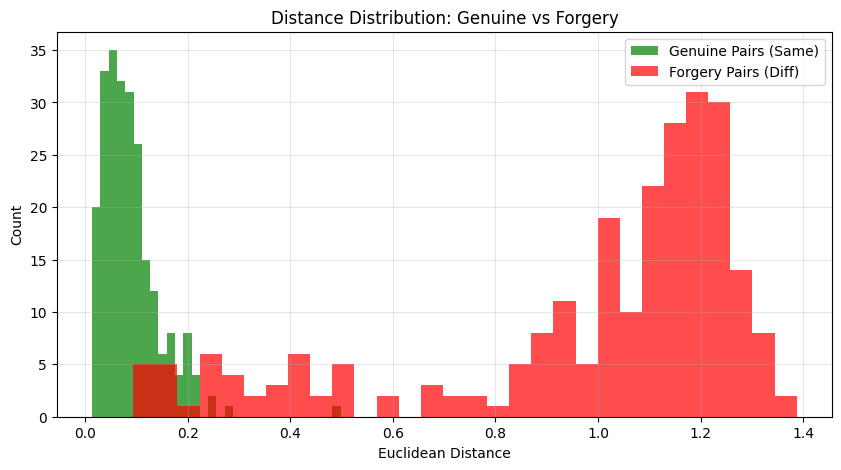

Avg Genuine Distance: 0.0897
Avg Forgery Distance: 0.9796
Best Threshold Found: 0.22
Best Accuracy: 96.88%
Confusion Matrix:
[[234   4]
 [ 11 231]]
False Acceptance Rate (FAR): 4.49% (Critical for Security)
False Rejection Rate (FRR):  1.70% (Annoying for User)


In [ ]:
threshold_duplet, best_acc_duplet = evaluate_model_duplet(model_duplet, test_loader_duplet, device)

## Triplet Loss Model

In [ ]:
def evaluate_model_triplet(model_triplet, test_loader, device):
    model_triplet.eval()
    all_distances = []
    all_labels = []

    # calculate the distance for each image pair
    with torch.no_grad():
        for i, (anchor, positive, negative) in enumerate(test_loader):
            anchor = anchor.to(device)
            positive = positive.to(device)
            negative = negative.to(device)

            anchor, positive, negative = model_triplet(anchor, positive, negative)
            loss = criterion_triplet(anchor, positive, negative)

            pos_dists = F.pairwise_distance(anchor, positive)
            all_distances.extend(pos_dists.cpu().numpy())
            all_labels.extend(np.zeros(len(pos_dists)))

            neg_dists = F.pairwise_distance(anchor, negative)
            all_distances.extend(neg_dists.cpu().numpy())
            all_labels.extend(np.ones(len(neg_dists)))

    all_distances = np.array(all_distances)
    all_labels = np.array(all_labels).ravel()

    save_path = '/content/drive/My Drive/glory/Paper RM/triplet_results.csv'

    try:
        df = pd.DataFrame({
            'distance': all_distances,
            'label': all_labels
        })
        df.to_csv(save_path, index=False)
    except OSError as e:
        print(f"error saving file")

    # split into positive and negative pairs
    pos_dists = all_distances[all_labels == 0]
    neg_dists = all_distances[all_labels == 1]

    # plot the distance for negative and positive pair
    plt.figure(figsize=(10, 5))
    plt.hist(pos_dists, bins=30, alpha=0.7, label='Genuine Pairs (Same)', color='green')
    plt.hist(neg_dists, bins=30, alpha=0.7, label='Forgery Pairs (Diff)', color='red')
    plt.xlabel('Euclidean Distance')
    plt.ylabel('Count')
    plt.title('Distance Distribution: Genuine vs Forgery')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"Avg Genuine Distance: {np.mean(pos_dists):.4f}")
    print(f"Avg Forgery Distance: {np.mean(neg_dists):.4f}")

    best_acc = 0
    best_thresh = 0

    # calculate the best threshold to classify forged and genuine signature
    for threshold in np.arange(0.0, 1.5, 0.01):

        # if the distance > threshold, predict 1 (different/forged), else 0 (same/genuine)
        predictions = (all_distances > threshold).astype(int)

        acc = accuracy_score(all_labels, predictions)
        if acc > best_acc:
            best_acc = acc
            best_thresh = threshold

    print(f"Best Threshold Found: {best_thresh:.2f}")
    print(f"Best Accuracy: {best_acc*100:.2f}%")

    final_preds = (all_distances > best_thresh).astype(int)
    cm = confusion_matrix(all_labels, final_preds)

    tn, fp, fn, tp = cm.ravel()

    # protect against division by zero
    FAR = fn / (tn + fn) if (tn + fn) > 0 else 0 # false positive
    FRR = fp / (tp + fp) if (tp + fp) > 0 else 0 # false negative

    print(f"Confusion Matrix:\n{cm}")
    print(f"False Acceptance Rate (FAR): {FAR*100:.2f}% (Critical for Security)")
    print(f"False Rejection Rate (FRR):  {FRR*100:.2f}% (Annoying for User)")

    return best_thresh, best_acc

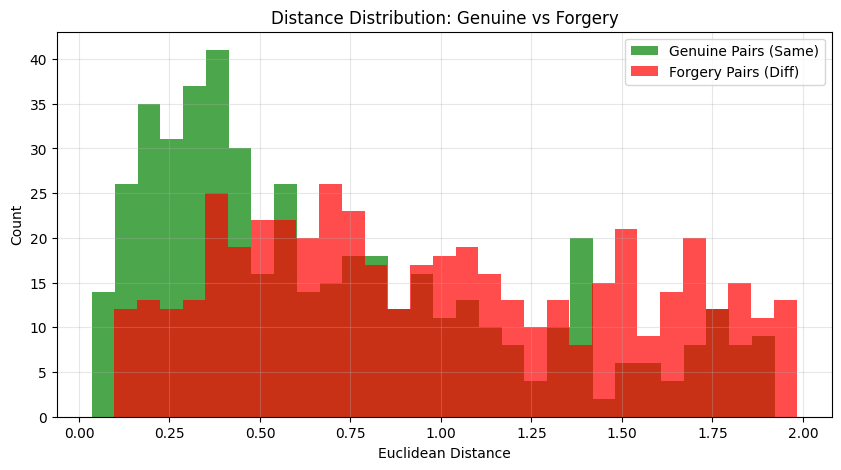

Avg Genuine Distance: 0.7152
Avg Forgery Distance: 0.9873
Best Threshold Found: 0.48
Best Accuracy: 62.81%
Confusion Matrix:
[[218 262]
 [ 95 385]]
False Acceptance Rate (FAR): 30.35% (Critical for Security)
False Rejection Rate (FRR):  40.49% (Annoying for User)


In [ ]:
threshold_triplet, best_acc_triplet = evaluate_model_triplet(model_triplet, test_loader_triplet, device)

In [ ]:
# get the best threshold and model
if best_acc_duplet > best_acc_triplet:
  best_threshold = threshold_duplet
  best_model = model_duplet
else:
  best_threshold = threshold_triplet
  best_model = model_triplet

# Test

In [ ]:
from PIL import Image

In [ ]:
# make a function that can save the embedding of the reference signature
# therefore, the system becomes more secure as we do not need to store the actual image as reference
def save_reference_embedding(model, ref_path, writer_id):
  # set ke mode evaluasi, bukan training lagi
  model.eval()

  # read and process image
  img_ref = Image.open(ref_path).convert("RGB")
  img_ref_tensor = transform_test(img_ref)
  img_ref_tensor = img_ref_tensor.unsqueeze(0).to(device)

  # extract the image embedding
  with torch.no_grad():
    embedding = model.embedding_net(img_ref_tensor)

  # save image
  embedding_numpy = embedding.cpu().numpy()
  filename = f"{writer_id}_signature.npy"
  np.save(filename, embedding_numpy)

In [ ]:
def verify_signature(model, ver_path, threshold, writer_id):
  # set to evaluation mode
  model.eval()

  # load both signatures (reference and new signature/verify)
  img_ver = Image.open(ver_path).convert("RGB")
  img_ver_tensor = transform_test(img_ver)
  img_ver_tensor = img_ver_tensor.unsqueeze(0).to(device)

  # get the reference image tensor
  try:
    saved_embedding = np.load(f"{writer_id}_signature.npy")
    ref_embedding = torch.from_numpy(saved_embedding).to(device)
  except FileNotFoundError:
    return "User not found. There is no reference image for the user"

  # predict the new signature with the help of the reference signature
  with torch.no_grad():
    verification_embedding = model.embedding_net(img_ver_tensor)
    dist = F.pairwise_distance(ref_embedding, verification_embedding).item()

  result = "GENUINE Signature" if dist < threshold else "FORGED Signature"
  color = "green" if dist < threshold else "red"

  # show the image that is being verified
  plt.subplot(1, 2, 2)
  plt.imshow(img_ver)
  plt.title("Signature to Verify")
  plt.axis('off')
  plt.show()
  print(f"Prediction: {result}")
  print(f"Distance: {dist:.4f} (Threshold: {threshold})")

  return dist < threshold # returns true if the signature is genuine, false if it is forged

In [ ]:
# load and save the reference image of writer_50
save_reference_embedding(best_model, "/content/dataset/test/writer_50/genuine/original_50_1.png", "writer_50")

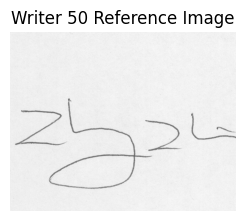

In [ ]:
# show reference image
ver_writer_50 = Image.open("/content/dataset/test/writer_50/genuine/original_50_1.png").convert("RGB")
plt.subplot(1, 2, 2)
plt.imshow(ver_writer_50)
plt.title("Writer 50 Reference Image")
plt.axis('off')
plt.show()

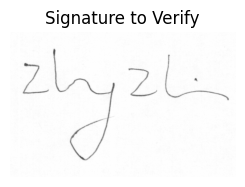

Prediction: FORGED Signature
Distance: 0.6823 (Threshold: 0.31)


np.False_

In [ ]:
suspicious_image = "/content/dataset/test/writer_50/forged/forgeries_50_18.png"

# predict the new signature
verify_signature(best_model, suspicious_image, best_threshold, 'writer_50')

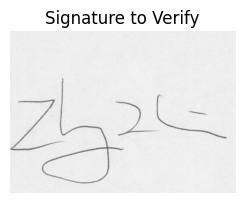

Prediction: GENUINE Signature
Distance: 0.0862 (Threshold: 0.31)


np.True_

In [ ]:
suspicious_image = "/content/dataset/test/writer_50/genuine/original_50_21.png"

verify_signature(best_model, suspicious_image, best_threshold, 'writer_50')

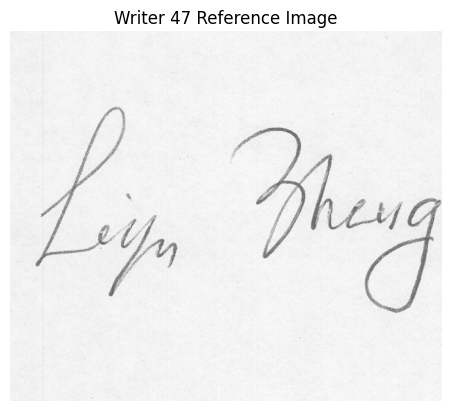

In [ ]:
save_reference_embedding(best_model, "/content/dataset/test/writer_47/genuine/original_47_1.png", "writer_47")

# show reference image
ver_writer_47 = Image.open("/content/dataset/test/writer_47/genuine/original_47_11.png").convert("RGB")
plt.imshow(ver_writer_47)
plt.title("Writer 47 Reference Image")
plt.axis('off')
plt.show()

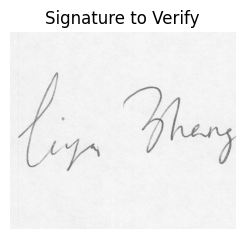

Prediction: GENUINE Signature
Distance: 0.1288 (Threshold: 0.31)


np.True_

In [ ]:
suspicious_image = "/content/dataset/test/writer_47/genuine/original_47_8.png"

verify_signature(best_model, suspicious_image, best_threshold, "writer_47")

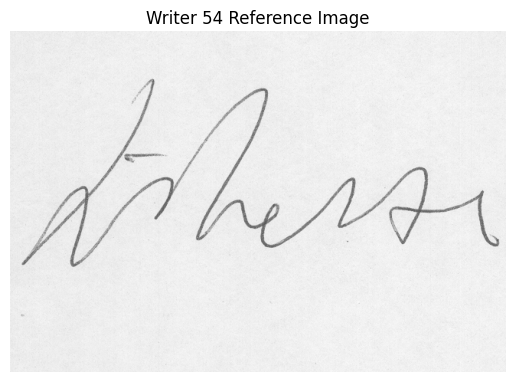

In [ ]:
save_reference_embedding(best_model, "/content/dataset/test/writer_54/genuine/original_54_18.png", "writer_54")

# show reference image
ver_writer_54 = Image.open("/content/dataset/test/writer_54/genuine/original_54_1.png").convert("RGB")
plt.imshow(ver_writer_54)
plt.title("Writer 54 Reference Image")
plt.axis('off')
plt.show()

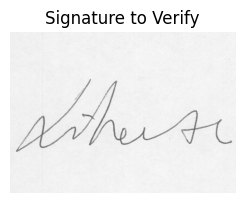

Prediction: GENUINE Signature
Distance: 0.2105 (Threshold: 0.31)


np.True_

In [ ]:
suspicious_image = "/content/dataset/test/writer_54/genuine/original_54_2.png"

verify_signature(best_model, suspicious_image, best_threshold, "writer_54")

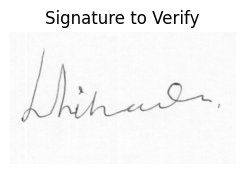

Prediction: FORGED Signature
Distance: 0.9822 (Threshold: 0.31)


np.False_

In [ ]:
suspicious_image = "/content/dataset/test/writer_54/forged/forgeries_54_9.png"

verify_signature(best_model, suspicious_image, best_threshold, "writer_54")